# Gradient Descent

In this tutorial, you'll learn about gradient descent, which is a flexible tool to identify parameters for any models.

In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Parameters
alpha = learning_rate = 0.01
iterations = 1000

Like last time, generate synthetic date with $\beta_0 = 5$ and $\beta_1 = 3$. 1000 points should be fine. You should have an array of x and y values.

In [18]:
x = np.random.randn(100)
y = 3 * x + 5 +np.random.randn(100)

In the real world, you do not know these beta values. Your goal is to find them! So, pretending you do not know $\beta_0 = 5$ and $\beta_1 = 3$, proceed as if you only observe x and y.

First, randomly guess $\beta_0$ and $\beta_1$, using the random operations in numpy.

In [31]:
beta_0 = np.random.randn(1)   
beta_1 = np.random.randn(1)
print(beta_0, beta_1)

[0.20031112] [1.13819256]


Write a function to compute the cost. This should be $\frac{1}{n} \sum ( y_{pred} - y )^2$. This is known as mean square loss. Your function should take in the real x and y values, then your guess of b0 and b1, then compute the loss.

In [21]:
def get_cost(x, y, guess_b0, guess_b1):
    n = len(y)
    y_pred = guess_b1 * x + guess_b0
    cost = (1/n) * np.sum((y_pred - y)**2)
    return cost

We are now going to walk through one iteration of gradient descent.
* Using the existing guesses for $\beta_0$ and $\beta_1$, generate predictions for y
* Calculate the gradients for $\beta_0$ and $\beta_1$ then use it to update the existing $\beta$ values.
* Compute the cost.

In [42]:
n = len(y)
b1 = np.random.randn(1)
b0 = np.random.randn(1)

y_pred = b1 * x + b0

b1_gradient = (1/n) * np.sum(x * (y_pred - y))
b0_gradient = (1/n) * np.sum(y_pred - y)

b1 = b1 - learning_rate * b1_gradient
b0 = b0 - learning_rate * b0_gradient

cost = get_cost(x, y, b0, b1)



In [44]:
cost

42.32769918385332

Write a for loop that iterates through the total iterations (1000). Within each loop, update $\beta_0$ and $\beta_1$.

Also, create an empty list that saves the cost each iteration, and two other lists for $\beta_0$ and $\beta_1$. You want to see that the loss is going down. To check this, print the loss every 100 iterations.

In [63]:
# Gradient Descent Function
def gradient_descent(x, y, learning_rate, iterations):
    n = len(y)

    b1 = np.random.randint(1, 100)
    b0 = np.random.randint(1, 100)

    cost_history = []
    b1_hist = []
    b0_hist = []

    for i in range(iterations):
        y_pred = b1 * x + b0

        b1_gradient = (1/n) * np.sum(x * (y_pred - y))
        b0_gradient = (1/n) * np.sum(y_pred - y)

        b1 = b1 - learning_rate * b1_gradient
        b0 = b0 - learning_rate * b0_gradient

        cost = get_cost(x, y, b0, b1)

        cost_history.append(cost)
        b1_hist.append(b1)
        b0_hist.append(b0)

        if (i % 100 == 0):
            print(f"Iteration number {i}: Cost {cost}, b1: {b1}, b0: {b0}")

    
    return b0, b1, cost_history, b1_hist, b0_hist

# Run Gradient Descent
final_b0, final_b1, cost_history, b1_hist, b0_hist = gradient_descent(x, y, learning_rate, iterations)

Iteration number 0: Cost 13336.412857040623, b1: 67.2357037431611, b0: 94.03767094944301
Iteration number 100: Cost 1446.0924146691416, b1: 22.525134627173777, b0: 35.485306736690475
Iteration number 200: Cost 159.68957668548055, b1: 8.818000121403333, b0: 15.491566261160523
Iteration number 300: Cost 18.81659785946423, b1: 4.6858412591925, b0: 8.610818992081636
Iteration number 400: Cost 3.132278320478166, b1: 3.469442335614143, b0: 6.222767779565544
Iteration number 500: Cost 1.3474872983747415, b1: 3.1238062885275637, b0: 5.386493512427099
Iteration number 600: Cost 1.1387089636546686, b1: 3.0310065841741998, b0: 5.090881147524765
Iteration number 700: Cost 1.1134684250186526, b1: 3.0085298332786743, b0: 4.985377865231691
Iteration number 800: Cost 1.1103021958607107, b1: 3.0042491443841493, b0: 4.947358818750655
Iteration number 900: Cost 1.1098894522346494, b1: 3.0040489818275344, b0: 4.933527275720915


In [64]:
print("b0:", final_b0, "\nb1:", final_b1)

b0: 4.928478494626675 
b1: 3.004449302858666


Plot a scatter plot of the x and y, then your regression line. You should use plt.plot and input predicted y values based on $x_{min}$ and $x_{max}$.

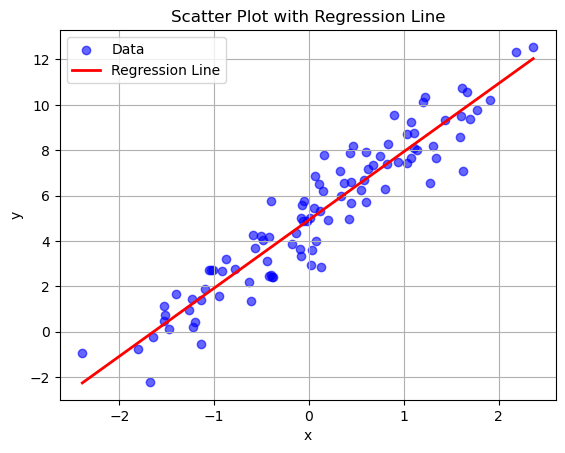

In [65]:
plt.scatter(x, y, color="blue", alpha=0.6, label="Data")

# Regression line (use only min and max of x)
x_min, x_max = np.min(x), np.max(x)
y_min_pred = final_b0 + final_b1 * x_min
y_max_pred = final_b0 + final_b1 * x_max

plt.plot([x_min, x_max], [y_min_pred, y_max_pred],
         color="red", linewidth=2, label="Regression Line")

# Labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot with Regression Line")
plt.legend()
plt.grid(True)
plt.show()

Plot the cost overtime. X-axis is the iteration, y-axis is the cost.

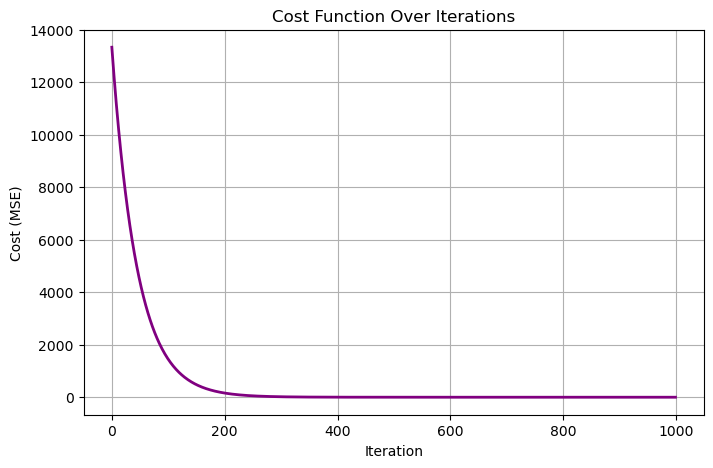

In [66]:
plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_history)), cost_history, color="purple", linewidth=2)

plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Over Iterations")
plt.grid(True)
plt.show()

Plot the evolution of the beta values.

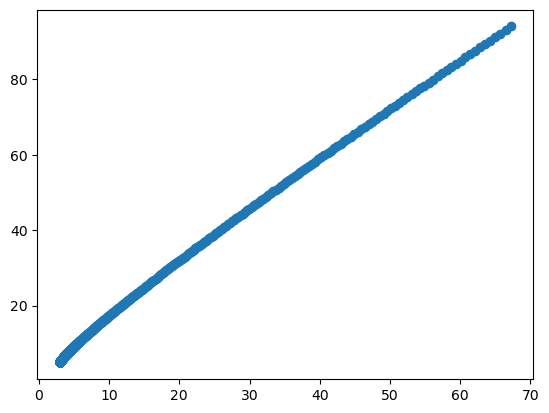

In [69]:
plt.scatter(b1_hist, b0_hist)